In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
sales = pd.read_csv('E://datascience//Supermart Grocery Sales - Retail Analytics Dataset.csv')


In [4]:
sales.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [5]:
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [6]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%m/%d/%Y', errors='coerce')


In [7]:
sales['Order Date'].dtype


dtype('<M8[ns]')

In [8]:
type(sales['Order Date'])


pandas.core.series.Series

In [9]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['day'] = (sales['Order Date']).dt.day
sales['month'] = (sales['Order Date']).dt.month
sales['year'] = (sales['Order Date']).dt.year

In [10]:
sales.describe()


,Order Date,Sales,Discount,Profit,day,month,year
count,5952,9994.000000,9994.000000,9994.000000,5952.000000,5952.000000,5952.000000
mean,2017-05-01 15:15:00,1496.596158,0.226817,374.937082,21.591062,7.664987,2016.721438
min,2015-01-13 00:00:00,500.000000,0.100000,25.250000,13.000000,1.000000,2015.000000
25%,2016-05-25 00:00:00,1000.000000,0.160000,180.022500,17.000000,5.000000,2016.000000
50%,2017-06-26 00:00:00,1498.000000,0.230000,320.780000,21.000000,8.000000,2017.000000
75%,2018-05-14 00:00:00,1994.750000,0.290000,525.627500,26.000000,11.000000,2018.000000
max,2018-12-30 00:00:00,2500.000000,0.350000,1120.950000,31.000000,12.000000,2018.000000
std,NaN,577.559036,0.074636,239.932881,5.242092,3.288410,1.126225


In [11]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]
categorical_columns

['Order ID',
 'Customer Name',
 'Category',
 'Sub Category',
 'City',
 'Region',
 'State']

In [12]:
print("# unique values in City: {0}".format(len(sales['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(sales['Customer Name'].unique().tolist())))
print("# unique values in Category: {0}".format(len(sales['Category'].unique().tolist())))
print("# unique values in City: {0}".format(len(sales['City'].unique().tolist())))
print("# unique values in State: {0}".format(len(sales['State'].unique().tolist())))

# unique values in City: 24
# unique values in Customer Type: 50
# unique values in Category: 7
# unique values in City: 24
# unique values in State: 1


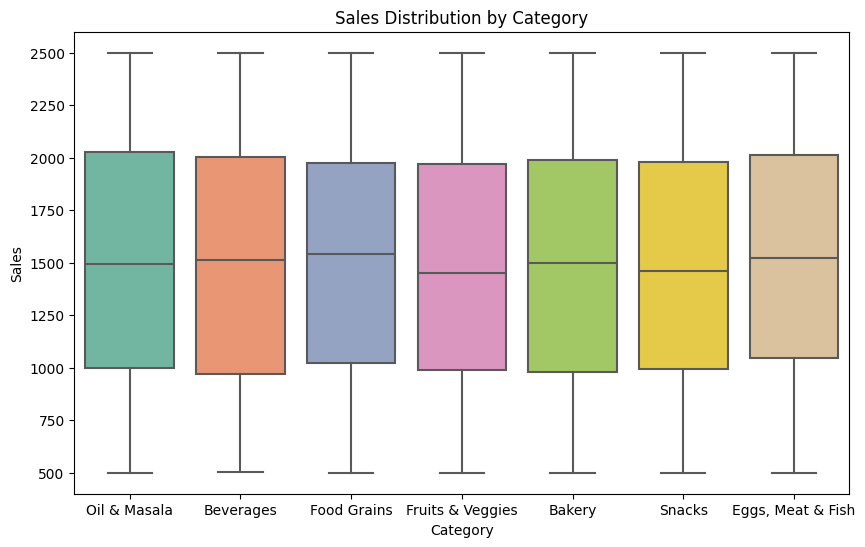

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=sales, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

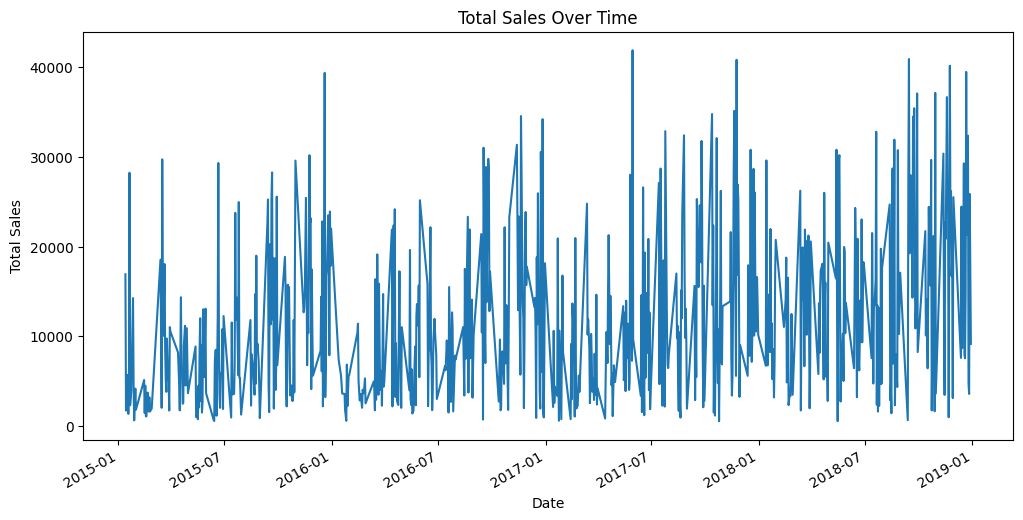

In [14]:
plt.figure(figsize=(12, 6))
sales.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [40]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

# Extract day, month, and year from 'Order Date'
sales['Order Day'] = sales['Order Date'].dt.day
sales['Order Month'] = sales['Order Date'].dt.month
sales['Order Year'] = sales['Order Date'].dt.year

In [46]:
sales['Category'] = le.fit_transform(sales['Category'])
sales['Sub Category'] = le.fit_transform(sales['Sub Category'])
sales['City'] = le.fit_transform(sales['City'])
sales['Region'] = le.fit_transform(sales['Region'])
sales['State'] = le.fit_transform(sales['State'])

# Display the first few rows after encoding
print(sales.head())

   Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
12     OD13        Sharon         6             6     5 2018-04-15       2   
14     OD15        Sundar         2             4     6 2016-11-22       0   
15     OD16        Ramesh         5             8     8 2016-11-22       0   
17     OD18        Arutra         1            13     0 2015-05-13       3   
18     OD19       Haseena         2            15    17 2015-08-27       3   

    Sales  Discount  Profit  State   day  month    year  Order Day  \
12   1659      0.19  315.21      0  15.0    4.0  2018.0       15.0   
14    831      0.22  207.75      0  22.0   11.0  2016.0       22.0   
15   1440      0.11  100.80      0  22.0   11.0  2016.0       22.0   
17   1617      0.19  113.19      0  13.0    5.0  2015.0       13.0   
18   1757      0.35  386.54      0  27.0    8.0  2015.0       27.0   

    Order Month  Order Year  
12          4.0      2018.0  
14         11.0      2016.0  
15         11.0     

In [49]:
sales[['day', 'month', 'year', 'Order Day', 'Order Month', 'Order Year', 'Order Date']] = sales[['day', 'month', 'year', 'Order Day', 'Order Month', 'Order Year', 'Order Date']].fillna(method='ffill')


C:\Users\nandi\AppData\Local\Temp\ipykernel_22720\2098363909.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales[['day', 'month', 'year', 'Order Day', 'Order Month', 'Order Year', 'Order Date']] = sales[['day', 'month', 'year', 'Order Day', 'Order Month', 'Order Year', 'Order Date']].fillna(method='ffill')


In [51]:
# Select features and target variable
features = sales.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales'])
target = sales['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
model = LinearRegression()

# Train the model

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 211916.24743607873
R-squared: 0.3933477370226285


### Visualize the results ###

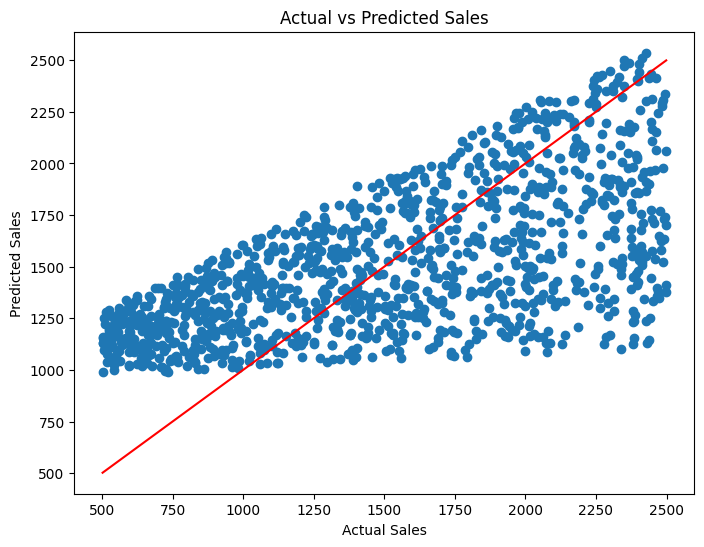

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),

max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()